# HR ANALYTICS PROJECT

**Problem Definition:- In this project we will predict the attrition for the peoples in organisation on the based of some feautures given in the dataset. The feautures are :- Age, Education,Work life balance, year in the company, years since last promotion, total working years rtc. Attrition is a big issue for the organization and it is defined as the no of employee leave the job over the years. As company invest alot of money on employee for hiring,training,devlopment etc of employee and if the exprienced employee leaves the job that will create the problem for comapny as comapny need to invest money again on another employee and that will impact on company.I will use classification in this projects as my target varible is attrition and the outcome is yes or no.



In [1]:
# import important libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
hr=pd.read_csv('hr_attrition_data.csv')

In [3]:
hr

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [4]:
hr.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [5]:
hr.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

In [6]:
hr.sample(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
1380   35        No      Travel_Rarely        682                   Sales   
59     37        No      Travel_Rarely       1115  Research & Development   
162    28        No      Travel_Rarely        440  Research & Development   
1289   38        No         Non-Travel       1336         Human Resources   
310    31        No      Travel_Rarely        106         Human Resources   
20     24        No         Non-Travel        673  Research & Development   
1436   21        No      Travel_Rarely        501                   Sales   
296    18       Yes      Travel_Rarely        230  Research & Development   
1347   36        No  Travel_Frequently       1213         Human Resources   
360    57        No      Travel_Rarely        593  Research & Development   

      DistanceFromHome  Education   EducationField  EmployeeCount  \
1380                18          4          Medical              1   
59                   1          4    Life Sciences              1   
162                 21          3          Medical              1   
1289                 2          3  Human Resources              1   
310                  2          3  Human Resources              1   
20                  11          2            Other              1   
1436                 5          1          Medical              1   
296                  3          3    Life Sciences              1   
1347                 2          1  Human Resources              1   
360                  1          4          Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1380            1945  ...                         4            80   
59                77  ...                         3            80   
162              221  ...                         3            80   
1289            1805  ...                         4            80   
310              424  ...                         4            80   
20                26  ...                         4            80   
1436            2021  ...                         4            80   
296              405  ...                         3            80   
1347            1890  ...                         4            80   
360              482  ...                         3            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1380                 1                  6                      2   
59                   1                  7                      2   
162                  1                  5                      2   
1289                 3                 13                      3   
310                  0                  9                      1   
20                   1                  5                      5   
1436                 0                  2                      6   
296                  0                  0                      2   
1347                 0                 10                      2   
360                  0                 15                      2   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1380               1               5                  3   
59                 4               7                  5   
162                1               5                  2   
1289               3              11                 10   
310                3               2                  2   
20                 2               4                  2   
1436               3               2                  2   
296                3               0                  0   
1347               2              10                  1   
360                3               3                  2   

      YearsSinceLastPromotion  YearsWithCurrManager  
1380                        0                     4  
59                          0                     7  
162                         0                     2  
1289                   

In [7]:
hr.shape

(1470, 35)

In [8]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# STATISTICAL SUMMARY

In [10]:
hr.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [11]:
hr.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [12]:
hr.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [13]:
hr.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [14]:
hr.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [15]:
hr.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [16]:
hr.YearsAtCompany.unique()


array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23], dtype=int64)

# DATA VISUALIZATION

In [17]:
#finding null values
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

NO NULLVALUES ARE PRESENT

<AxesSubplot:>

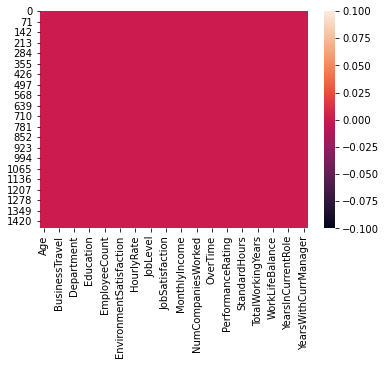

In [18]:
sns.heatmap(hr.isnull())

In [19]:
#Checking corelation of columns with our target variable attrition first we have to transform the target column into label
Num_val = {'Yes':1, 'No':0}
hr['Attrition'] = hr["Attrition"].apply(lambda x: Num_val[x])
hr.head()


Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

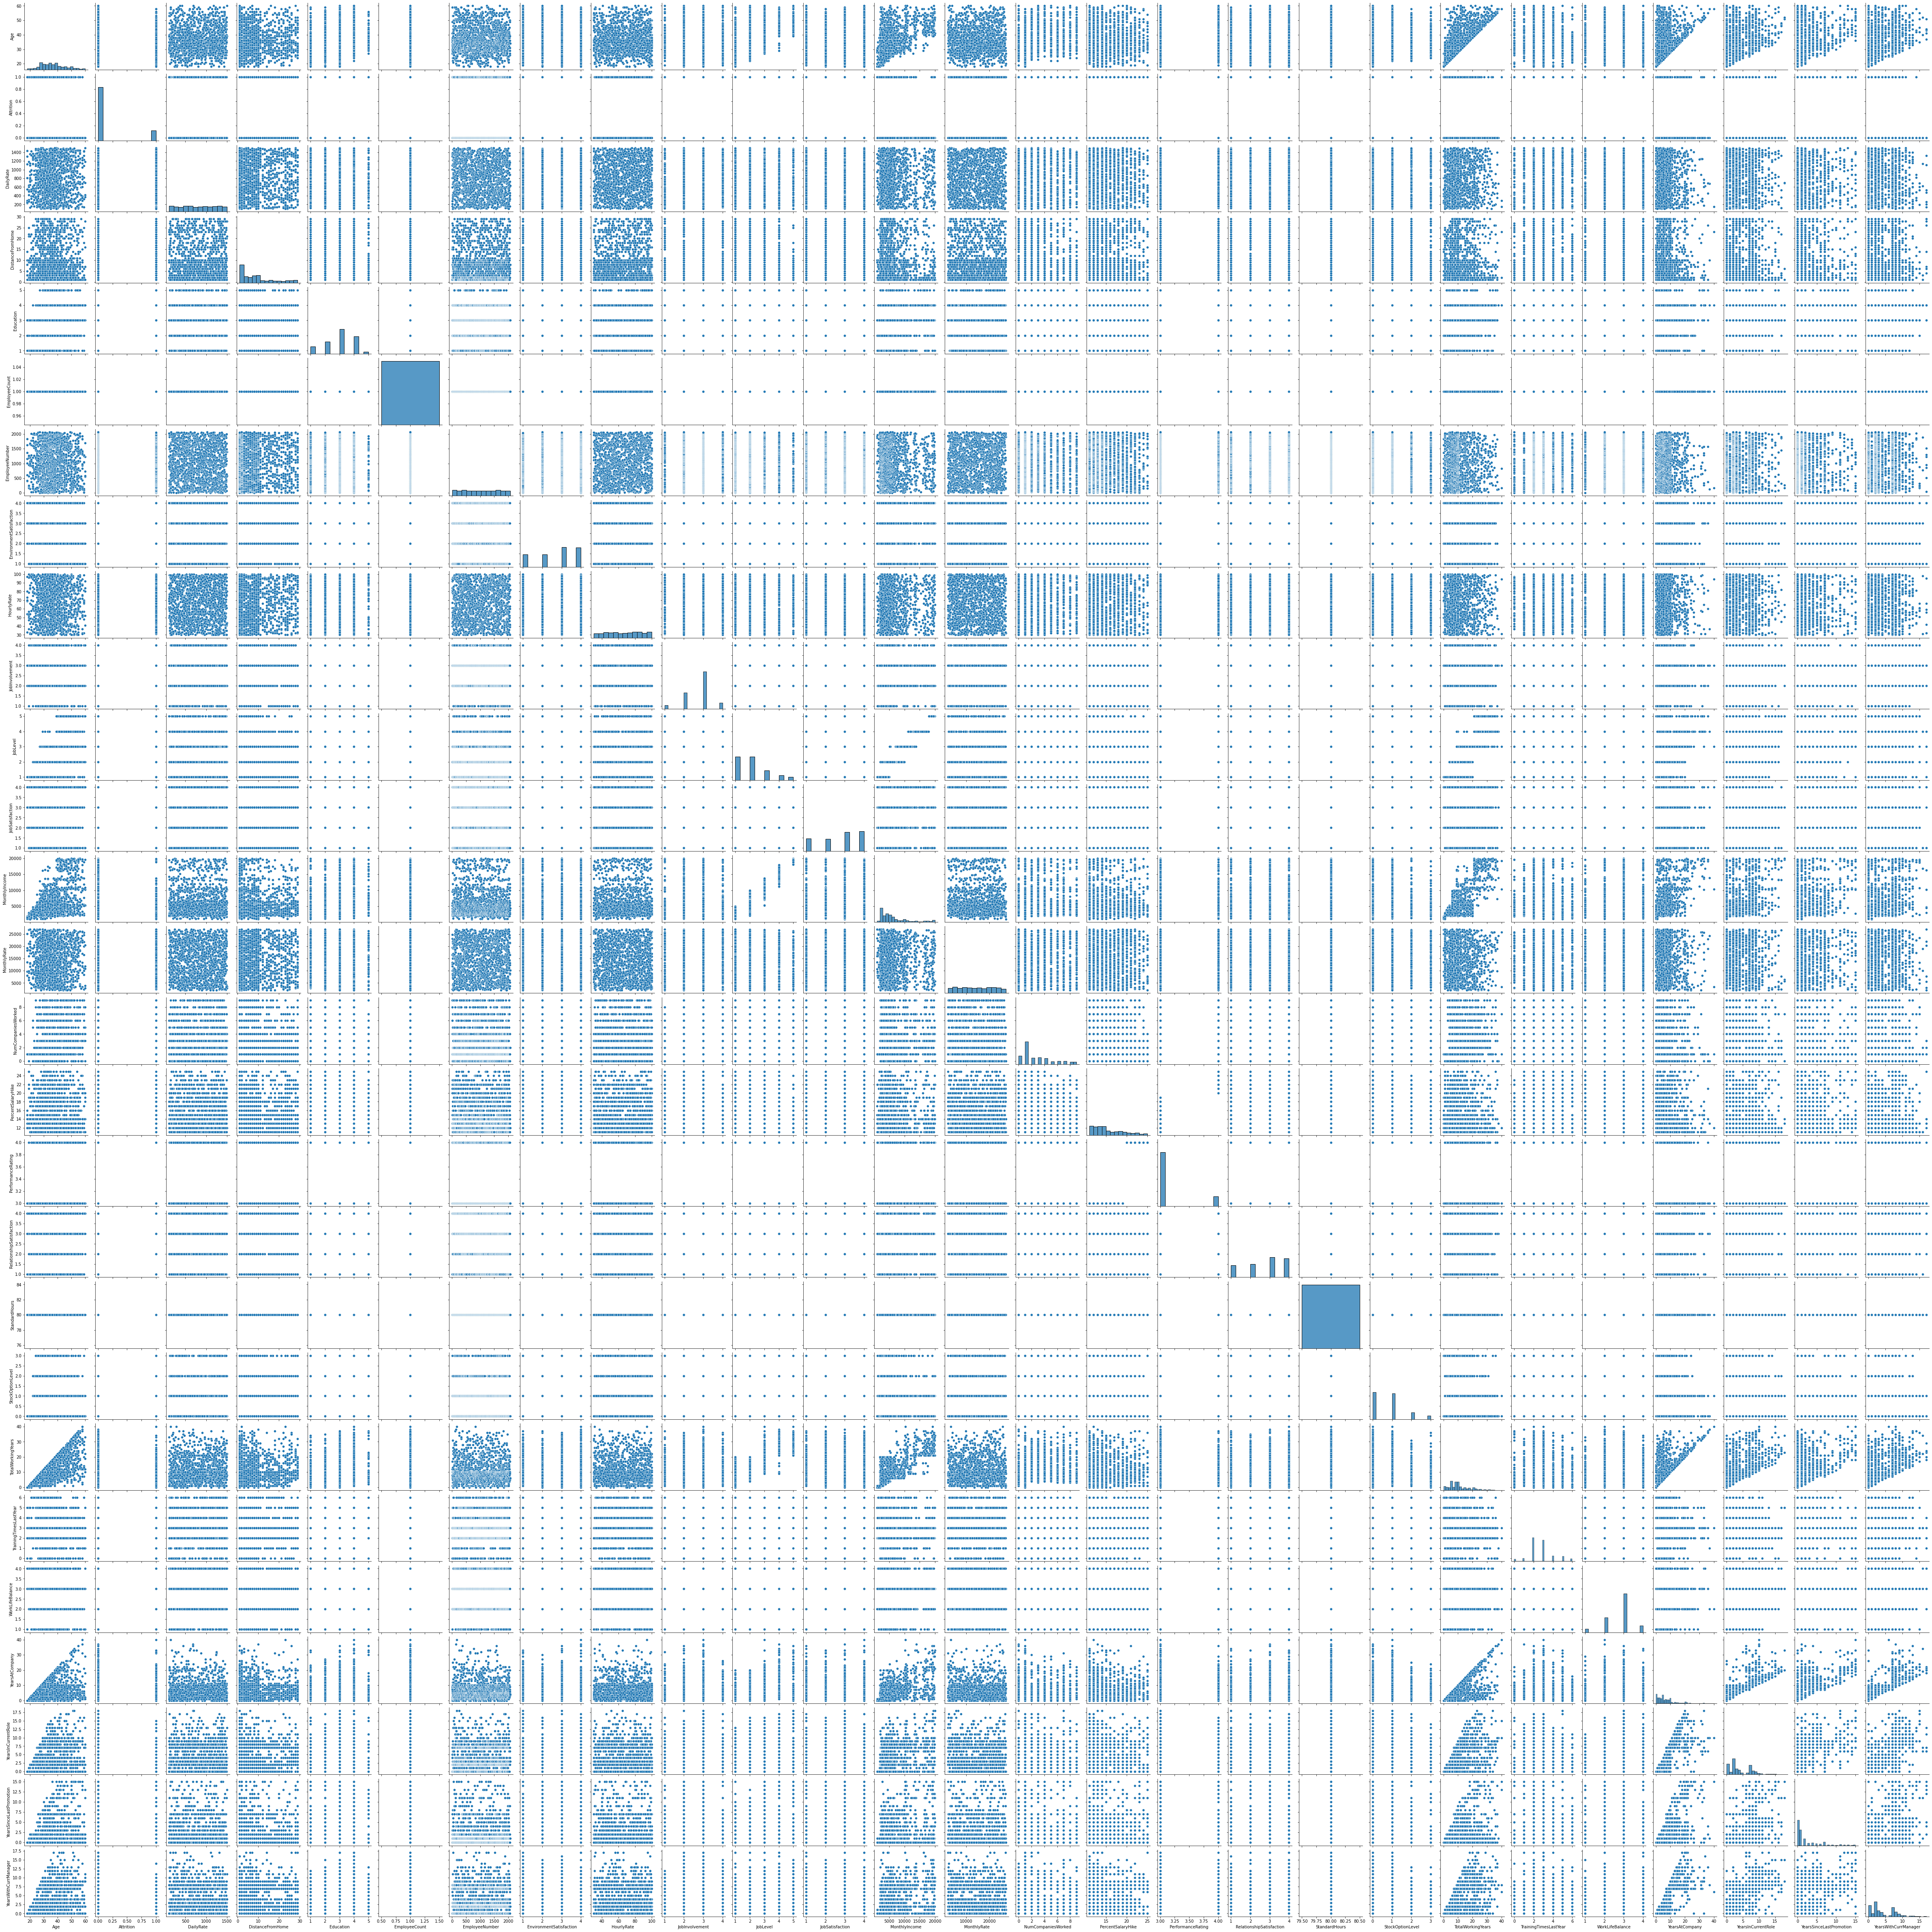

In [20]:
sns.pairplot(hr)

# CORRELATION

In [21]:
corr = hr.corr()

In [22]:
corr

Age  Attrition  DailyRate  DistanceFromHome  \
Age                       1.000000  -0.159205   0.010661         -0.001686   
Attrition                -0.159205   1.000000  -0.056652          0.077924   
DailyRate                 0.010661  -0.056652   1.000000         -0.004985   
DistanceFromHome         -0.001686   0.077924  -0.004985          1.000000   
Education                 0.208034  -0.031373  -0.016806          0.021042   
EmployeeCount                  NaN        NaN        NaN               NaN   
EmployeeNumber           -0.010145  -0.010577  -0.050990          0.032916   
EnvironmentSatisfaction   0.010146  -0.103369   0.018355         -0.016075   
HourlyRate                0.024287  -0.006846   0.023381          0.031131   
JobInvolvement            0.029820  -0.130016   0.046135          0.008783   
JobLevel                  0.509604  -0.169105   0.002966          0.005303   
JobSatisfaction          -0.004892  -0.103481   0.030571         -0.003669   
MonthlyIncome             0.497855  -0.159840   0.007707         -0.017014   
MonthlyRate               0.028051   0.015170  -0.032182          0.027473   
NumCompaniesWorked        0.299635   0.043494   0.038153         -0.029251   
PercentSalaryHike         0.003634  -0.013478   0.022704          0.040235   
PerformanceRating         0.001904   0.002889   0.000473          0.027110   
RelationshipSatisfaction  0.053535  -0.045872   0.007846          0.006557   
StandardHours                  NaN        NaN        NaN               NaN   
StockOptionLevel          0.037510  -0.137145   0.042143          0.044872   
TotalWorkingYears         0.680381  -0.171063   0.014515          0.004628   
TrainingTimesLastYear    -0.019621  -0.059478   0.002453         -0.036942   
WorkLifeBalance          -0.021490  -0.063939  -0.037848         -0.026556   
YearsAtCompany            0.311309  -0.134392  -0.034055          0.009508   
YearsInCurrentRole        0.212901  -0.160545   0.009932          0.018845   
YearsSinceLastPromotion   0.216513  -0.033019  -0.033229          0.010029   
YearsWithCurrManager      0.202089  -0.156199  -0.026363          0.014406   

                          Education  EmployeeCount  EmployeeNumber  \
Age                        0.208034            NaN       -0.010145   
Attrition                 -0.031373            NaN       -0.010577   
DailyRate                 -0.016806            NaN       -0.050990   
DistanceFromHome           0.021042            NaN        0.032916   
Education                  1.000000            NaN        0.042070   
EmployeeCount                   NaN            NaN             NaN   
EmployeeNumber             0.042070            NaN        1.000000   
EnvironmentSatisfaction   -0.027128            NaN        0.017621   
HourlyRate                 0.016775            NaN        0.035179   
JobInvolvement             0.042438            NaN       -0.006888   
JobLevel                   0.101589            NaN       -0.018519   
JobSatisfaction           -0.011296            NaN       -0.046247   
MonthlyIncome              0.094961            NaN       -0.014829   
MonthlyRate               -0.026084            NaN        0.012648   
NumCompaniesWorked         0.126317            NaN       -0.001251   
PercentSalaryHike         -0.011111            NaN       -0.012944   
PerformanceRating         -0.024539            NaN       -0.020359   
RelationshipSatisfaction  -0.009118            NaN       -0.069861   
StandardHours                   NaN            NaN             NaN   
StockOptionLevel           0.018422            NaN        0.062227   
TotalWorkingYears          0.148280            NaN       -0.014365   
TrainingTimesLastYear     -0.025100            NaN        0.023603   
WorkLifeBalance            0.009819            NaN        0.010309   
YearsAtCompany             0.069114            NaN       -0.011240   
YearsInCurrentRole         0.060236            NaN       -0.008416   
YearsSinceLastPromotion   

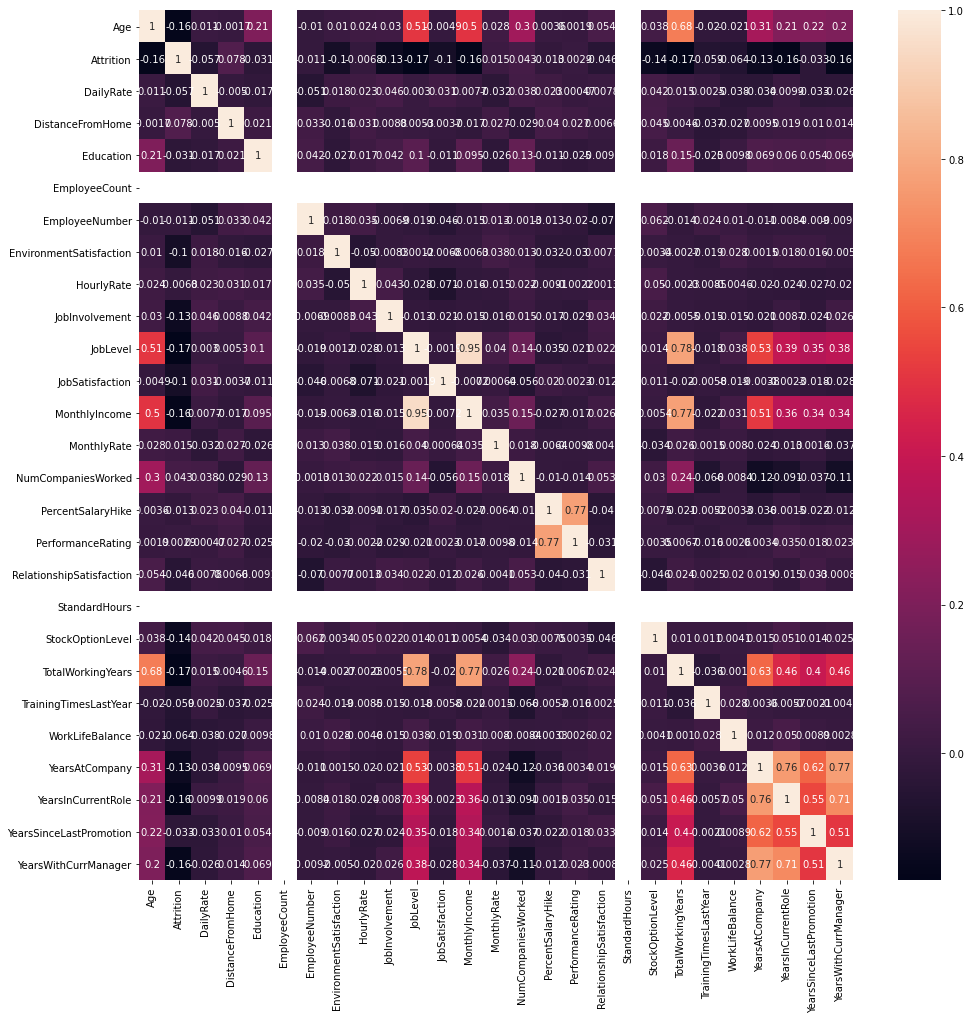

In [23]:
corr_hmap=hr.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()


In [24]:
hr.columns.to_series().groupby(hr.dtypes).groups

{int64: ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

<AxesSubplot:>

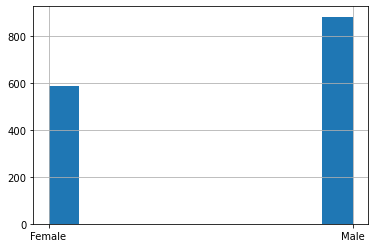

In [25]:
hr.Gender.hist()

<AxesSubplot:>

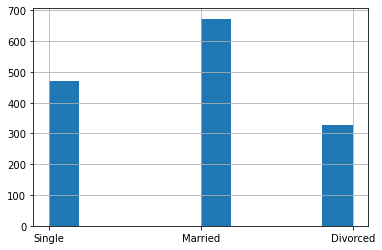

In [26]:
hr.MaritalStatus.hist()

<AxesSubplot:>

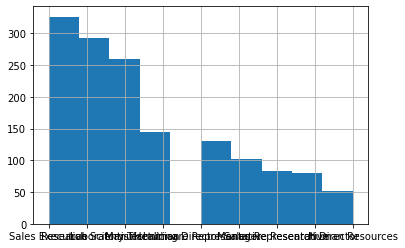

In [27]:
hr.JobRole.hist()

<AxesSubplot:>

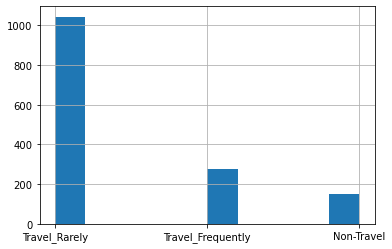

In [28]:
hr.BusinessTravel.hist()

<AxesSubplot:>

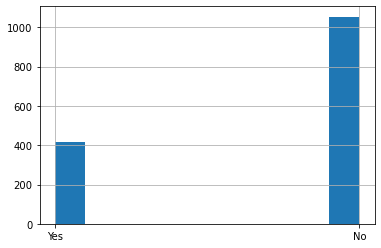

In [29]:
hr.OverTime.hist()

<AxesSubplot:>

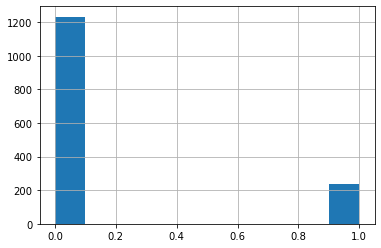

In [30]:
hr.Attrition.hist()


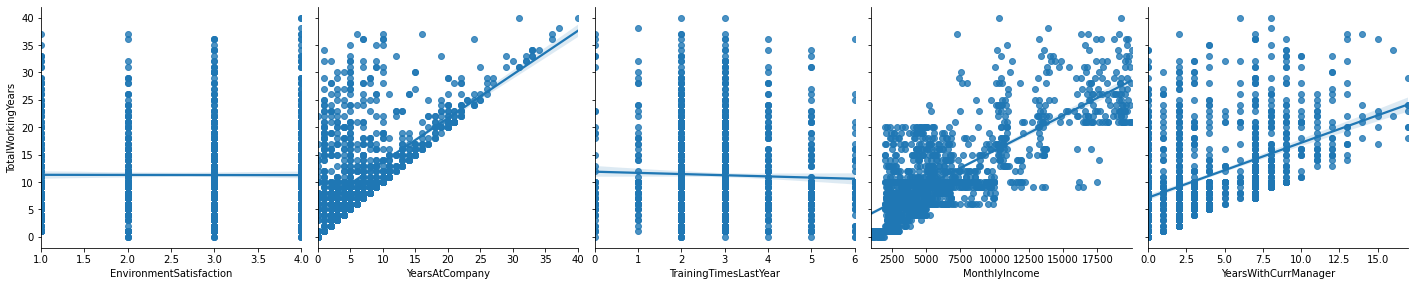

In [31]:
sns.pairplot(hr, x_vars=['EnvironmentSatisfaction','YearsAtCompany', 'TrainingTimesLastYear','MonthlyIncome', 'YearsWithCurrManager'], y_vars='TotalWorkingYears', size=4, aspect=1, kind='reg')


Plotting the above and below graph, in order to know that how the variables are corelating with Total Working Years field, where we see that :

Years with the current manager ,

Monthly income ,

Years at the company,

Age,

Joblevel,

Number of companies worked,

Years since last promotion,

Years in current role.

The above fields are positively corelated with the total working years of the employees of the organization

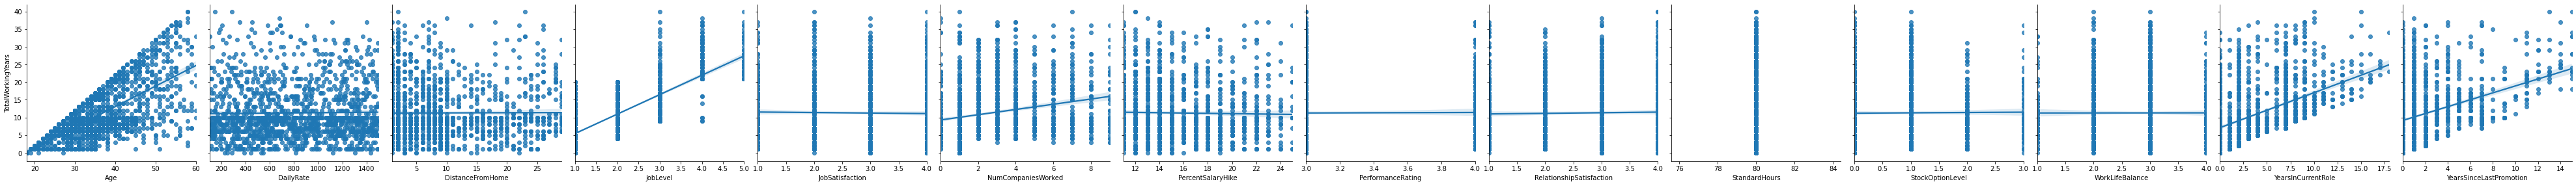

In [32]:
sns.pairplot(hr, x_vars=['Age', 'DailyRate', 'DistanceFromHome','JobLevel', 
                         'JobSatisfaction','NumCompaniesWorked', 'PercentSalaryHike',
                         'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
                         'StockOptionLevel','WorkLifeBalance', 'YearsInCurrentRole',
        'YearsSinceLastPromotion'], y_vars='TotalWorkingYears', size=4, aspect=1, kind='reg')


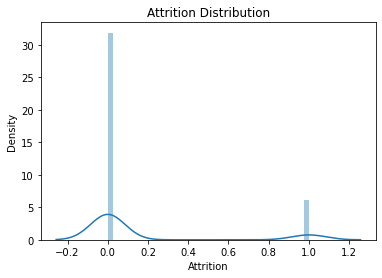

In [33]:
#Checking how my target variable distributed
sns.distplot(hr['Attrition'])
plt.title("Attrition Distribution")
plt.show()

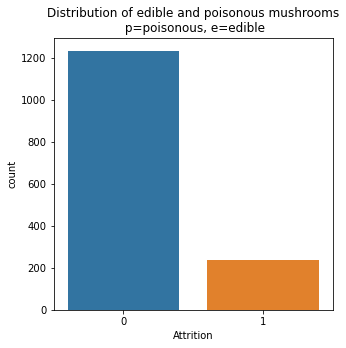

In [34]:
plt.figure(figsize=(5,5))
sns.countplot(hr['Attrition'])
plt.title("Distribution of edible and poisonous mushrooms\n p=poisonous, e=edible")
plt.show()


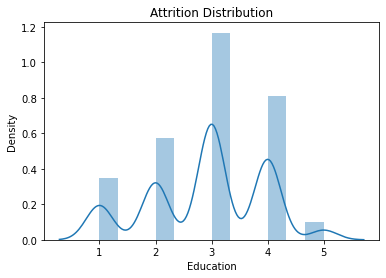

In [35]:
#Checking how my target variable distributed
sns.distplot(hr['Education'])
plt.title("Attrition Distribution")
plt.show()


In [36]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'Relations

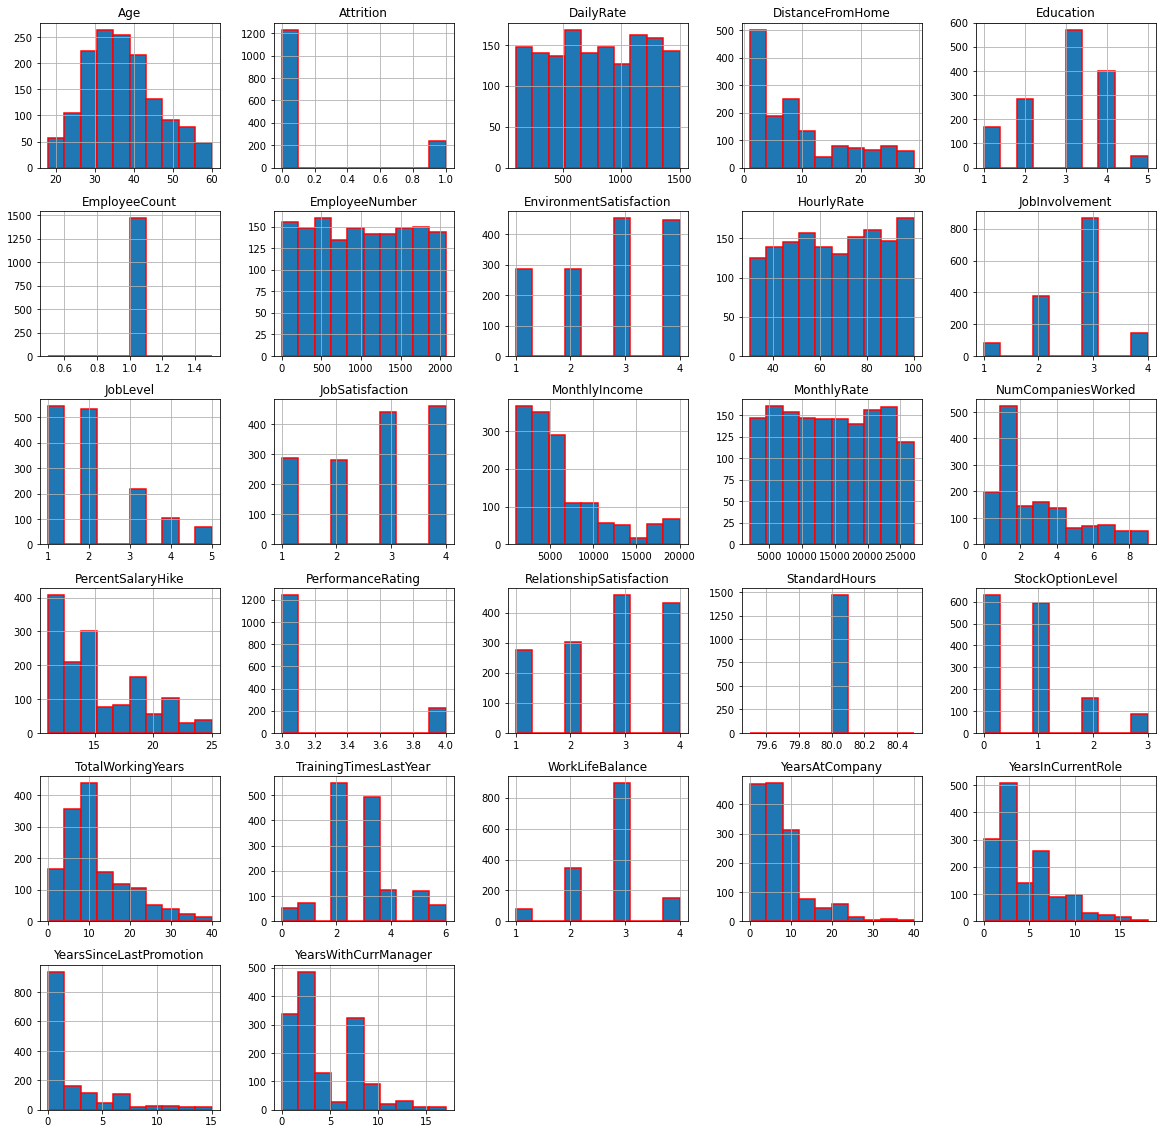

In [37]:
#Checking the distribution of all columns by plotting histogram
hr.hist(edgecolor="red",linewidth=1.5,figsize=(20,20))

As per above obsrvation we can see that there is no any column present in the dataset id normally distributed so skewnees is present in the dataset as we saw earlier in describe method. By this i can say that i have to proceed with data cleaning method to clean the data and remove the skewness.



<AxesSubplot:>

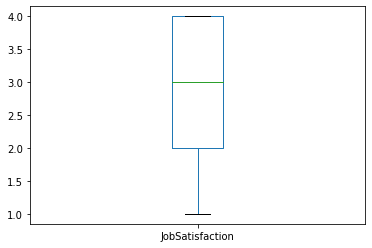

In [38]:
hr['JobSatisfaction'].plot.box()

<AxesSubplot:>

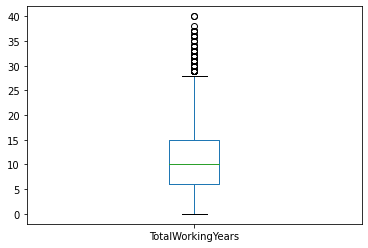

In [39]:
hr['TotalWorkingYears'].plot.box()


<AxesSubplot:>

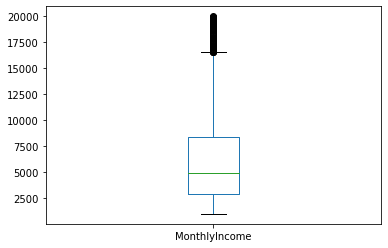

In [40]:
hr['MonthlyIncome'].plot.box()


Outliers here are the observations that we find at the abnormal distance from other values.



<AxesSubplot:xlabel='Education', ylabel='Attrition'>

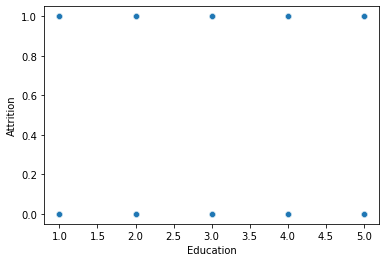

In [41]:
#Checking the relation between edcucation and our target variable

sns.scatterplot(x="Education",y="Attrition",data=hr)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Attrition'>

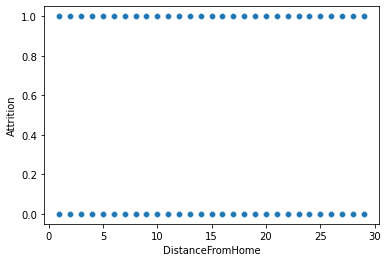

In [42]:
sns.scatterplot(x="DistanceFromHome",y="Attrition",data=hr)


<AxesSubplot:xlabel='Department', ylabel='Attrition'>

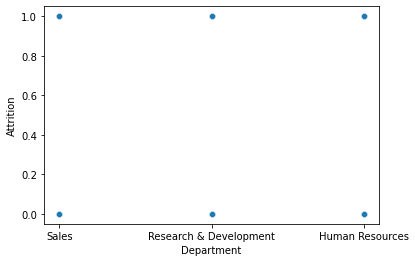

In [43]:
sns.scatterplot(x="Department",y="Attrition",data=hr)

<AxesSubplot:xlabel='Age', ylabel='Attrition'>

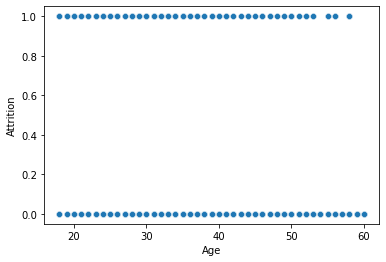

In [44]:
sns.scatterplot(x="Age",y="Attrition",data=hr)

# DATA TRANSFORMATION

In [45]:
hr.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# ENCODING

In [46]:
#Converting object varible into numerical to see to build the model
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hr['BusinessTravel'] = le.fit_transform(hr['BusinessTravel'])
hr['Department'] = le.fit_transform(hr['Department'])
hr['EducationField'] = le.fit_transform(hr['EducationField'])
hr['Gender'] = le.fit_transform(hr['Gender'])
hr['JobRole'] = le.fit_transform(hr['JobRole'])
hr['MaritalStatus'] = le.fit_transform(hr['MaritalStatus'])
hr['Over18'] = le.fit_transform(hr['Over18'])
hr['OverTime'] = le.fit_transform(hr['OverTime'])


In [47]:
hr.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [48]:
collist = hr.columns.values
ncol=12
nrows=10

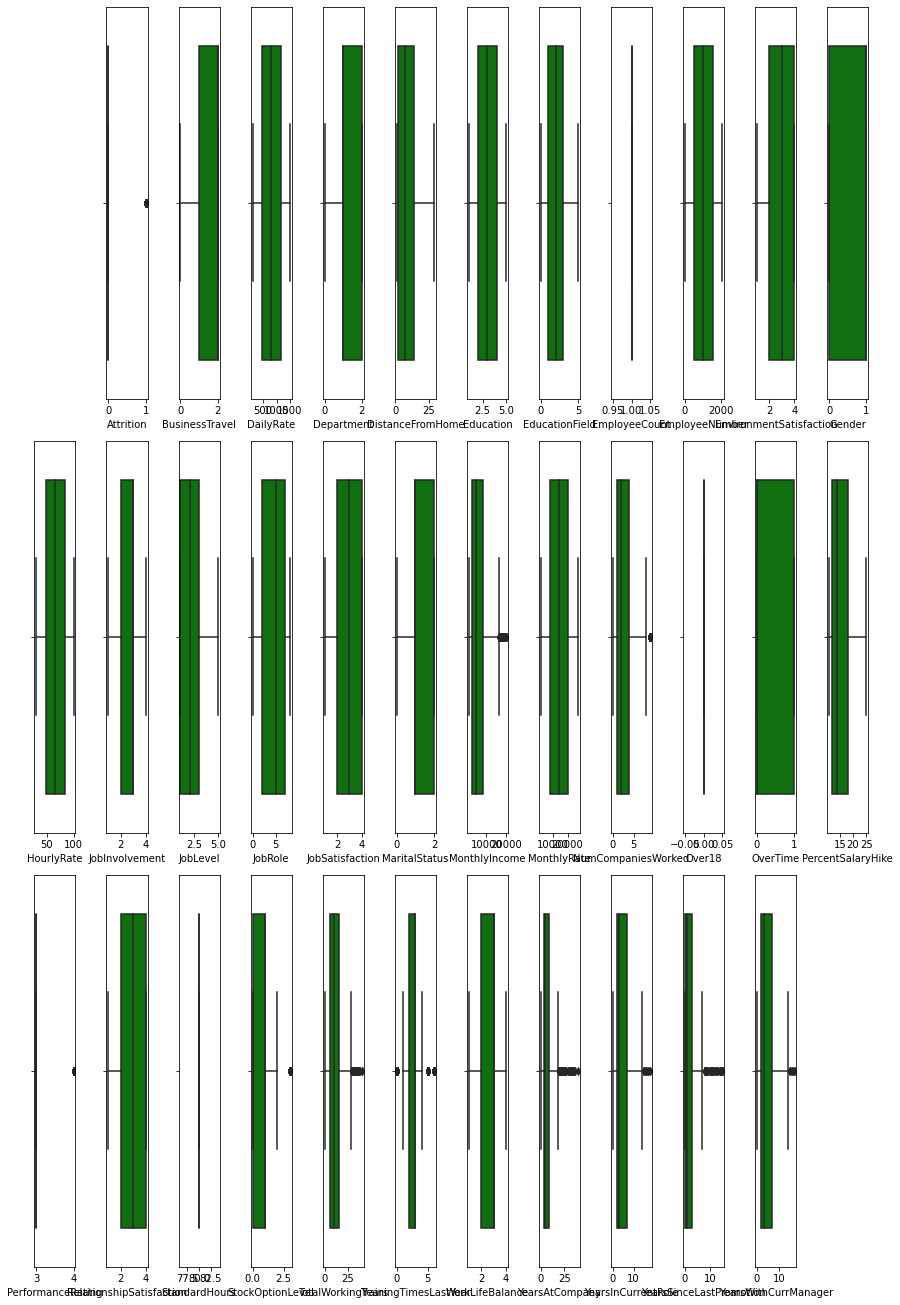

In [49]:
plt.figure(figsize = (ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(hr[collist[i]],color ='green',orient='v')
    plt.tight_layout()


In [50]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(hr))
threshold =3
new_hr = hr[(z<3).all(axis=1)]
new_hr


Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

In [51]:
#IQR Method

Q1 = hr.quantile(0.25)
Q3 = hr.quantile(0.75)
IQR = Q3-Q1
print(IQR)


Age                            13.00
Attrition                       0.00
BusinessTravel                  1.00
DailyRate                     692.00
Department                      1.00
DistanceFromHome               12.00
Education                       2.00
EducationField                  2.00
EmployeeCount                   0.00
EmployeeNumber               1064.50
EnvironmentSatisfaction         2.00
Gender                          1.00
HourlyRate                     35.75
JobInvolvement                  1.00
JobLevel                        2.00
JobRole                         5.00
JobSatisfaction                 2.00
MaritalStatus                   1.00
MonthlyIncome                5468.00
MonthlyRate                 12414.50
NumCompaniesWorked              3.00
Over18                          0.00
OverTime                        1.00
PercentSalaryHike               6.00
PerformanceRating               0.00
RelationshipSatisfaction        2.00
StandardHours                   0.00
S

In [52]:
hr_new1 = hr[~((hr<(Q1-1.5*IQR)) | (hr> (Q3+1.5*IQR))).any(axis=1)]
print(hr_new1.shape)


(641, 35)


In [53]:
hr.shape

(1470, 35)

# dataloss

In [54]:
#Percentage Loss of data after removing outliers
percentage_loss=((1470-779)/1470)*100
percentage_loss


47.006802721088434

As per above observation we can see that the when we proceed with outliers removal process the percentage loss of data is high. So i will not remove the outliers from dataset.



# DATASET FOR MODELBUILDING

In [55]:
#Seprating independent and target variable
x= hr.drop("Attrition",axis=1)
y= hr["Attrition"] #Target variable


In [56]:
x.shape

(1470, 34)

In [57]:
#Linear Dimensionality Reduction:- Converting many number of less corelated columns into less and more related columns instead of drop any column
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
x= pca.fit_transform(x)
x.shape


(1470, 10)

In [58]:
#Removing Skewness
from sklearn.preprocessing import power_transform
x= power_transform(x,method="yeo-johnson")


In [59]:
y = y.values.reshape(-1,1)

y.shape


(1470, 1)

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


# Outcome has only 2 variables so we can use binary classification model

In [61]:
#Finding Best Random State

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

best_rstate=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25,random_state=i)
    mod = LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempaccu = accuracy_score(y_test,y_pred)
    
    if tempaccu>accu:
        accu = tempaccu
        best_rstate = i
        
        
        
print(f"Best Accuracy {accu*100} found on random_state {best_rstate}")
    


Best Accuracy 88.04347826086956 found on random_state 163


In [62]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size =.20,random_state =163)


In [63]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model = [LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),SGDClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy Score of ", m, "is :")
    print(accuracy_score(y_test,predm)*100)
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')


Accuracy Score of  LogisticRegression() is :
88.09523809523809
[[259   0]
 [ 35   0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       259
           1       0.00      0.00      0.00        35

    accuracy                           0.88       294
   macro avg       0.44      0.50      0.47       294
weighted avg       0.78      0.88      0.83       294



Accuracy Score of  GaussianNB() is :
88.43537414965986
[[259   0]
 [ 34   1]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       259
           1       1.00      0.03      0.06        35

    accuracy                           0.88       294
   macro avg       0.94      0.51      0.50       294
weighted avg       0.90      0.88      0.83       294



Accuracy Score of  SVC() is :
88.09523809523809
[[259   0]
 [ 35   0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       25

In [64]:
gnb = GaussianNB()

In [65]:
gnb.fit(x_train, y_train)
gnb.score(x_train,y_train)
predgnb = gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8843537414965986
[[259   0]
 [ 34   1]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       259
           1       1.00      0.03      0.06        35

    accuracy                           0.88       294
   macro avg       0.94      0.51      0.50       294
weighted avg       0.90      0.88      0.83       294



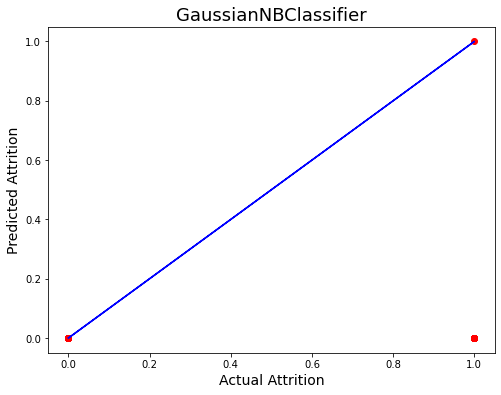

In [66]:

plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predgnb,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Attrition",fontsize = 14)
plt.ylabel("Predicted Attrition",fontsize =14)
plt.title('GaussianNBClassifier',fontsize=18)
plt.show()

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [68]:
y_pred_prob = gnb.predict_proba(x_test)[:,1]

In [71]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

In [72]:
fpr

array([0.        , 0.        , 0.00772201, 0.00772201, 0.02316602,
       0.02316602, 0.03474903, 0.03474903, 0.05791506, 0.05791506,
       0.08494208, 0.08494208, 0.0965251 , 0.0965251 , 0.11583012,
       0.11583012, 0.13127413, 0.13127413, 0.13899614, 0.13899614,
       0.16988417, 0.16988417, 0.21621622, 0.21621622, 0.23166023,
       0.23166023, 0.24710425, 0.24710425, 0.31274131, 0.31274131,
       0.32818533, 0.32818533, 0.37451737, 0.37451737, 0.40926641,
       0.40926641, 0.49034749, 0.49034749, 0.52895753, 0.52895753,
       0.53667954, 0.53667954, 0.57528958, 0.57528958, 0.61003861,
       0.61003861, 0.66409266, 0.66409266, 0.69111969, 0.69111969,
       0.71814672, 0.71814672, 0.88803089, 0.88803089, 0.94980695,
       0.94980695, 1.        ])

In [73]:
tpr

array([0.        , 0.02857143, 0.02857143, 0.08571429, 0.08571429,
       0.17142857, 0.17142857, 0.2       , 0.2       , 0.22857143,
       0.22857143, 0.25714286, 0.25714286, 0.28571429, 0.28571429,
       0.34285714, 0.34285714, 0.37142857, 0.37142857, 0.4       ,
       0.4       , 0.42857143, 0.42857143, 0.45714286, 0.45714286,
       0.48571429, 0.48571429, 0.54285714, 0.54285714, 0.57142857,
       0.57142857, 0.6       , 0.6       , 0.62857143, 0.62857143,
       0.65714286, 0.65714286, 0.71428571, 0.71428571, 0.74285714,
       0.74285714, 0.77142857, 0.77142857, 0.8       , 0.8       ,
       0.82857143, 0.82857143, 0.88571429, 0.88571429, 0.91428571,
       0.91428571, 0.94285714, 0.94285714, 0.97142857, 0.97142857,
       1.        , 1.        ])

In [74]:
threshold

array([1.52653109, 0.52653109, 0.48020252, 0.44971426, 0.41962774,
       0.38831713, 0.36245395, 0.35788286, 0.33550313, 0.33239962,
       0.31170165, 0.30826007, 0.30636916, 0.30629252, 0.29682287,
       0.2945809 , 0.28536159, 0.28460981, 0.27649287, 0.2722538 ,
       0.25708027, 0.25608624, 0.2350213 , 0.23065825, 0.21992604,
       0.21842444, 0.21408939, 0.21275841, 0.19034793, 0.1886731 ,
       0.18390036, 0.18213245, 0.16609489, 0.16601784, 0.15890566,
       0.15884652, 0.1392918 , 0.13843342, 0.13361256, 0.13265806,
       0.13191579, 0.13061193, 0.12440201, 0.12373425, 0.10956552,
       0.10829807, 0.09739668, 0.09652851, 0.09042962, 0.08632059,
       0.08112443, 0.08101389, 0.0446255 , 0.04444686, 0.03382179,
       0.03213703, 0.01080175])

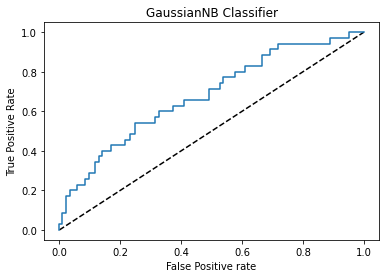

In [75]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label= 'GaussianNB')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')
plt.title('GaussianNB Classifier')
plt.show()

In [76]:
auc_score = roc_auc_score(y_test,gnb.predict(x_test))
print(auc_score)

0.5142857142857142


# saving the model

In [82]:
import pickle
filename='hr analytics_.pkl'
pickle.dump(GaussianNB(), open(filename,'wb'))

In [83]:
#Model Saving with best model RandomForestRegressor
import joblib 

joblib.dump(gnb,'gnbfile.obj')

['gnbfile.obj']

In [84]:
#Loading to see my model
gnb_from_joblib = joblib.load('gnbfile.obj')
gnb_from_joblib

GaussianNB()

In [85]:
k=gnb_from_joblib.predict(x_test)

In [86]:
# Saving The predictions in csv file
import numpy as np
import pandas as pd
prediction = pd.DataFrame(k, columns=['predictions']).to_csv('Attrition_prediction.csv')


# ---------------------END-----------